In [ ]:
#implementing logistic regression model from classification

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna(axis=0)
df.isna().sum()

In [ ]:
df['Class'].value_counts()  #0 for legit transaction and 1 for fraud ones

In [ ]:
legit_df=df[df.Class==0]
fraud_df=df[df.Class==1]

In [ ]:
print(legit_df.shape,
fraud_df.shape)

In [ ]:
legit_df['Amount'].describe()

In [ ]:
fraud_df['Amount'].describe()

In [ ]:
df.groupby('Class').mean()

under-sampling:
the legit table will be under sampled with data equal to fraudelent data points. fraud data = 103 , legit data = 33656

In [ ]:
legit_sample_df = legit_df.sample(n=492)

In [ ]:
new_df= pd.concat([legit_sample_df,fraud_df],axis=0)

In [ ]:

new_df.head()

In [ ]:
new_df.tail()

In [ ]:
new_df['Class'].value_counts() # same number of fraud and legit values

In [ ]:
new_df.groupby('Class').mean() #checked the mean - kindah similar - which means its a good sample

splitting data set - new_df into features and impacts

In [ ]:
x=new_df.drop(['Class'],axis=1)
y=new_df['Class']

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
x_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(x_train_pred,y_train)   #calculating accuracy of training set

In [ ]:
print('accuracy on train dataset:' , accuracy_train)

accuracy on train dataset: 0.9390088945362135


In [ ]:
x_test_pred = model.predict(x_test)
accuracy_test = accuracy_score(x_test_pred,y_test)

In [ ]:
print('accuracy on test dataset :' , accuracy_test)

accuracy on test dataset : 0.9441624365482234


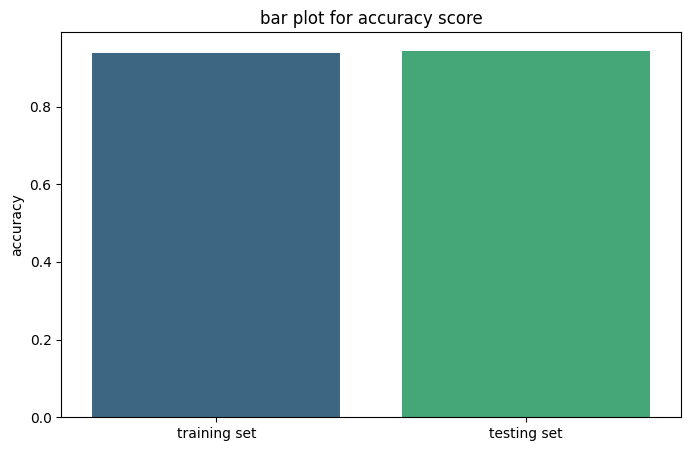

In [ ]:
#graphs for the accuracy score
import seaborn as sns
import matplotlib.pyplot as plt

accuracies = [accuracy_train,accuracy_test]
labels =['training set','testing set']
plt.figure(figsize=(8, 5))
plt.title('bar plot for accuracy score')
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylabel('accuracy')
plt.show()

Text(0.5, 1.0, 'confusion matrix')

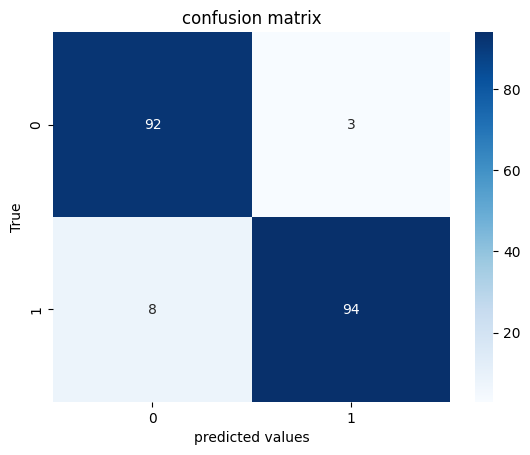

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,x_test_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('predicted values')
plt.ylabel('True')
plt.title('confusion matrix')

both of the accuracies show that our logistic regression model is well-fitted.

In [ ]:
#saving the trained model
import pickle
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
#checking whether the predictions are right
input_data =(12714,1.085132	,-0.284200,	1.227259,	0.994783,	-0.971597,	0.104091,	-0.842026	,0.172350	,2.309517	,-0.565225,	0.288409,	-2.856187,	0.321535,	1.446209,	0.316601,	0.076154,	0.759545,	0.040792	,-0.824541,	-0.187177,	-0.020988,	0.235961,	-0.030041,	0.044704,	0.194784,	0.458817,	-0.012930,	0.018620,	43.00	)

In [ ]:
array = np.asarray(input_data)


In [ ]:
reshaped = array.reshape(1,-1)

In [ ]:
new_pred = loaded_model.predict(reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(new_pred)
if(new_pred==0.0):
  print('legit transaction')
else:
  print('fraud transaction')

[0]
legit transaction
